In [2]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

11501568/11490434 [==============================] - 3s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

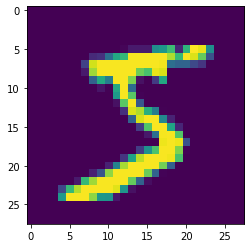

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [10]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

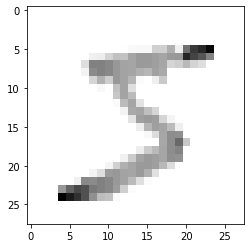

In [11]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [12]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print(y_train[0])

5


In [14]:
import numpy as np
i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [18]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [19]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [20]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2118 - accuracy: 0.9347 - val_loss: 0.0912 - val_accuracy: 0.9728
Epoch 2/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0727 - accuracy: 0.9781 - val_loss: 0.0632 - val_accuracy: 0.9823
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 0.0516 - val_accuracy: 0.9851
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0565 - val_accuracy: 0.9830
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0577 - val_accuracy: 0.9840
Epoch 7/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0472 -

In [23]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
hist.history

{'loss': [0.21181750297546387,
  0.07273022830486298,
  0.04968765750527382,
  0.035965483635663986,
  0.027833083644509315,
  0.023476021364331245,
  0.01881718449294567,
  0.0154714435338974,
  0.012519032694399357,
  0.011726285330951214],
 'accuracy': [0.9347083568572998,
  0.9781249761581421,
  0.9841041564941406,
  0.9887499809265137,
  0.9913333058357239,
  0.9920833110809326,
  0.9936458468437195,
  0.9949583411216736,
  0.9957500100135803,
  0.9961458444595337],
 'val_loss': [0.09123694151639938,
  0.06317948549985886,
  0.051614910364151,
  0.05648169293999672,
  0.04207981377840042,
  0.057735711336135864,
  0.04724888131022453,
  0.04593275114893913,
  0.06427863985300064,
  0.04187418520450592],
 'val_accuracy': [0.9727500081062317,
  0.9823333621025085,
  0.9850833415985107,
  0.9829999804496765,
  0.9868333339691162,
  0.984000027179718,
  0.9872499704360962,
  0.9884166717529297,
  0.98416668176651,
  0.9886666536331177]}

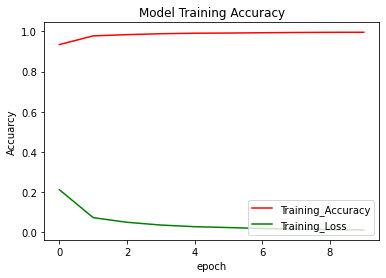

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
     